# Rock Paper Scissor
- **Nama:** I Putu Eka Putra Juniawan
- **Email:** ekaputrajuniawan@gmail.com
- **ID Dicoding:** ptekaputra

In [40]:
# Importing necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [41]:
# Define dataset directory
dataset_dir = "./dataset/"

In [42]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.5, 1.5],  # Tambahkan variasi kecerahan
    validation_split=0.4  # 40% untuk validation
)


In [43]:
# Load train and validation sets
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(200, 300),
    batch_size=32,
    class_mode='sparse',
    subset='training',
    seed=123
)

Found 1314 images belonging to 3 classes.


In [44]:
validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(200, 300),
    batch_size=32,
    class_mode='sparse',
    subset='validation',
    seed=123
)

Found 874 images belonging to 3 classes.


In [45]:
# Class names
class_names = list(train_generator.class_indices.keys())
print("Class names:", class_names)

Class names: ['paper', 'rock', 'scissors']


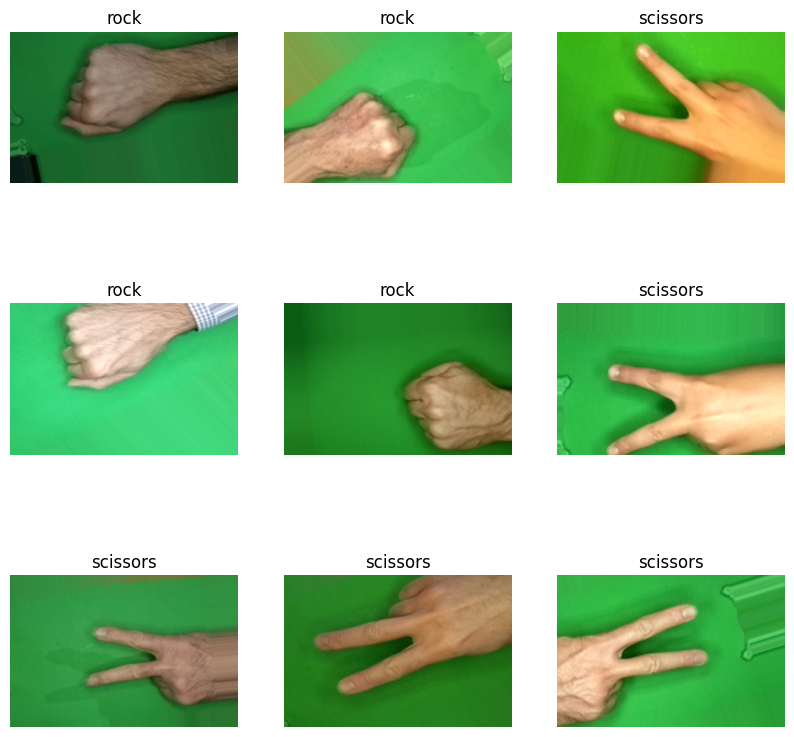

In [46]:
# Visualize some images from the dataset with augmentation
plt.figure(figsize=(10, 10))
images, labels = train_generator.__next__()  # Use __next__() method to get the next batch
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[int(labels[i])])
    plt.axis("off")
plt.show()


In [47]:
# Building the model
model = Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(200, 300, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, (3, 3), activation='relu'),  # Tambahkan lapisan konvolusi lebih besar
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),  # Tambahkan dense layer lebih besar
    layers.Dense(3, activation='softmax')
])

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [49]:
# Summary of the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 198, 298, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 99, 149, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 97, 147, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 48, 73, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 46, 71, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 23, 35, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 206080)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │    52,756,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,128,323 (202.67 MB)

 Trainable params: 53,128,323 (202.67 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Train the model
epochs = 10  # Set epochs to prevent exceeding time limit
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 121s 3s/step - accuracy: 0.3464 - loss: 1.9914 - val_accuracy: 0.3249 - val_loss: 1.1012
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.3746 - loss: 1.0900 - val_accuracy: 0.3776 - val_loss: 1.0946
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 127s 3s/step - accuracy: 0.4455 - loss: 1.0484 - val_accuracy: 0.4851 - val_loss: 1.0214
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 127s 3s/step - accuracy: 0.4998 - loss: 0.9967 - val_accuracy: 0.6533 - val_loss: 0.8017
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 127s 3s/step - accuracy: 0.6515 - loss: 0.8056 - val_accuracy: 0.6842 - val_loss: 0.7059
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 127s 3s/step - accuracy: 0.6280 - loss: 0.8405 - val_accuracy: 0.7346 - val_loss: 0.6635
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 128s 3s/step - accuracy: 0.7287 - loss: 0.7055 - val_accuracy: 0.7403 - val_loss: 0.6067
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 126s 3s/step - accuracy: 0.7640 - loss: 0.6126 - val_accuracy: 0.7769 - v

In [51]:
# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [52]:
epochs_range = range(epochs)

Text(0.5, 1.0, 'Training and Validation Accuracy')

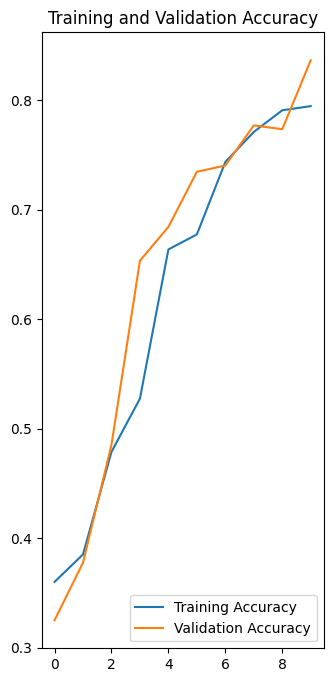

In [53]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

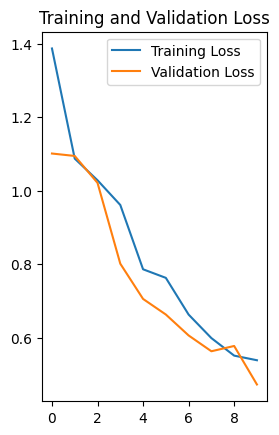

In [54]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [55]:
# Evaluate the model on the validation set
final_val_loss, final_val_acc = model.evaluate(validation_generator)
print(f"Final validation accuracy: {final_val_acc:.2f}")

28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 720ms/step - accuracy: 0.8078 - loss: 0.5166
Final validation accuracy: 0.81


In [58]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Path ke gambar baru yang ingin diprediksi
img_path = './predict/scissor.png'

# Memuat dan preprocess gambar
img = image.load_img(img_path, target_size=(200, 300))  # Sesuaikan ukuran dengan input model
img_array = image.img_to_array(img)  # Mengubah gambar menjadi array
img_array = np.expand_dims(img_array, axis=0)  # Menambah dimensi batch
img_array = img_array / 255.0  # Normalisasi sesuai dengan training

# Membuat prediksi dengan model yang telah dilatih
predictions = model.predict(img_array)

# Menampilkan prediksi
predicted_class_index = np.argmax(predictions[0])  # Mengambil index dari prediksi dengan nilai tertinggi
predicted_class = class_names[predicted_class_index]

print(f"Gambar diprediksi sebagai: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Gambar diprediksi sebagai: scissors
